In [1]:
import pandas as pd

In [5]:
df = pd.read_excel("Data_ready.xlsm")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
df.isnull().sum()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [37]:
cols = ['MSSubClass', 'MSZoning', 'LotArea',
       'Utilities', 
       'Neighborhood', 'OverallCond', 'YearBuilt', 
       'RoofMatl', 'Exterior1st',
       'ExterCond', 'Foundation', 
       'TotalBsmtSF', 
       'CentralAir', 
       'GrLivArea',  'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
       'TotRmsAbvGrd', 'GarageType',
       'GarageCars', 'GarageArea', 'PavedDrive',  
       'YrSold', 'SaleType',
       'SalePrice']
home = df[cols].copy()
home.head()

,MSSubClass,MSZoning,LotArea,Utilities,Neighborhood,OverallCond,YearBuilt,RoofMatl,Exterior1st,ExterCond,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageType,GarageCars,GarageArea,PavedDrive,YrSold,SaleType,SalePrice
0,60,RL,8450,AllPub,CollgCr,5,2003,CompShg,VinylSd,TA,...,3,1,8,Attchd,2,548,Y,2008,WD,208500
1,20,RL,9600,AllPub,Veenker,8,1976,CompShg,MetalSd,TA,...,3,1,6,Attchd,2,460,Y,2007,WD,181500
2,60,RL,11250,AllPub,CollgCr,5,2001,CompShg,VinylSd,TA,...,3,1,6,Attchd,2,608,Y,2008,WD,223500
3,70,RL,9550,AllPub,Crawfor,5,1915,CompShg,Wd Sdng,TA,...,3,1,7,Detchd,3,642,Y,2006,WD,140000
4,60,RL,14260,AllPub,NoRidge,5,2000,CompShg,VinylSd,TA,...,4,1,9,Attchd,3,836,Y,2008,WD,250000


In [38]:
home.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Utilities        0
Neighborhood     0
OverallCond      0
YearBuilt        0
RoofMatl         0
Exterior1st      0
ExterCond        0
Foundation       0
TotalBsmtSF      0
CentralAir       0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
GarageType      81
GarageCars       0
GarageArea       0
PavedDrive       0
YrSold           0
SaleType         0
SalePrice        0
dtype: int64

In [39]:
home.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,5.575342,1971.267808,1057.429452,1515.463699,1.565068,0.382877,2.866438,1.046575,6.517808,1.767123,472.980137,2007.815753,180921.195890
std,42.300571,9981.264932,1.112799,30.202904,438.705324,525.480383,0.550916,0.502885,0.815778,0.220338,1.625393,0.747315,213.804841,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,1954.000000,795.750000,1129.500000,1.000000,0.000000,2.000000,1.000000,5.000000,1.000000,334.500000,2007.000000,129975.000000
50%,50.000000,9478.500000,5.000000,1973.000000,991.500000,1464.000000,2.000000,0.000000,3.000000,1.000000,6.000000,2.000000,480.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,6.000000,2000.000000,1298.250000,1776.750000,2.000000,1.000000,3.000000,1.000000,7.000000,2.000000,576.000000,2009.000000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,6110.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,14.000000,4.000000,1418.000000,2010.000000,755000.000000


In [41]:
home.to_csv('housing.csv',index=False)

<Axes: >

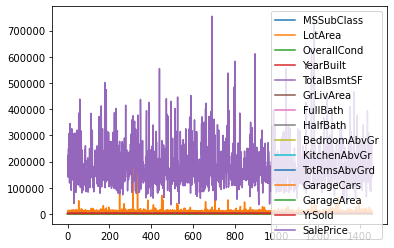

In [40]:
home.plot()